# Batch dispersion analysis

## Initialise session and load data

In [1]:
%run src_ipynb/init.ipynb

import pandas as pd
from os.path import dirname, join, abspath
from os import getcwd, pardir, walk
from os import getcwd, walk
import numpy as np
import matplotlib.pyplot as plot
import pickle

save_path = join(records.rootDirectory, 'data/export/figs')
%run src_ipynb/load_data.ipynb

Saved updated sensor names and dumped into /Users/macoscar/Documents/04_Projects/02_FabLab/01_SmartCitizen/01_Repositories/DataAnalysis/smartcitizen-iscape-data/data/interim/sensorNames.json


HTML(value='<h2>Test load</h2>')

interactive(children=(SelectMultiple(description='Test', layout=Layout(width='600px'), options={'2017-06_INT_F…

HTML(value='<hr>')

Output()

## Input options

In [28]:
import pandas as pd
from os.path import dirname, join, abspath
from os import getcwd, pardir

# INPUT DATA
# Name of test to be analysed
dispersion_test = '2019-09_INT_DELIVERIES_SEPTEMBER'
# How to export the files ('png' or 'fig' or 'nada')
type_file = 'png'
# number_of_measurements/limit to be considered NG sensor
limit = 10
# Min/max date for the analysis
min_date = None
max_date = None
# In case there is a 
ignore_missing_channels = True
# ----------   

## Get list of common channels
Displays a warning in case there is a device that has fewer channels than the rest. You can choose whether or not to ignore it or update the list of common channels

In [29]:
# Get list of common channels            
list_channels = list()
# Get list of devices
list_devices = list(records.readings[dispersion_test]['devices'].keys())
# Init list of common channels. Get the one that has the most
list_channels = records.readings[dispersion_test]['devices'][list_devices[0]]['data'].columns
# Extract list of common channels
len_channels = len(list_channels)

for device in records.readings[dispersion_test]['devices']:
    
    if ignore_missing_channels: 
        # We don't reduce the list in case the new list is smaller
        list_channels = list(set(list_channels) | set(records.readings[dispersion_test]['devices'][device]['data'].columns))
    else:
        # We reduce it
        list_channels = list(set(list_channels) & set(records.readings[dispersion_test]['devices'][device]['data'].columns))

    print ('Device {}'.format(device))
    print ('\tMin reading at {}'.format(records.readings[dispersion_test]['devices'][device]['data'].index[0]))
    print ('\tMax reading at {}'.format(records.readings[dispersion_test]['devices'][device]['data'].index[-1]))
    
    if len_channels != len(records.readings[dispersion_test]['devices'][device]['data'].columns): 
        print("\tWARNING: Device {} has {}. Current common list length is {}".format(device, len(records.readings[dispersion_test]['devices'][device]['data'].columns), len_channels))
        len_channels = len(list_channels)
        if ignore_missing_channels:
            print ("\tIgnoring missing channels")

print('Final list of channels:\n', list_channels)

if min_date != None: min_date = min_date.tz_localize('UTC').tz_convert('Europe/Madrid')
if max_date != None: max_date = max_date.tz_localize('UTC').tz_convert('Europe/Madrid')

Device 9964
	Min reading at 2019-09-10 19:21:00+02:00
	Max reading at 2019-09-12 01:59:00+02:00
Device 9965
	Min reading at 2019-09-10 19:18:00+02:00
	Max reading at 2019-09-12 01:59:00+02:00
Device 9966
	Min reading at 2019-09-10 19:24:00+02:00
	Max reading at 2019-09-12 01:59:00+02:00
Device 9967
	Min reading at 2019-09-10 19:20:00+02:00
	Max reading at 2019-09-12 01:59:00+02:00
Device 9968
	Min reading at 2019-09-10 18:02:00+02:00
	Max reading at 2019-09-12 01:59:00+02:00
Device 9969
	Min reading at 2019-09-10 19:19:00+02:00
	Max reading at 2019-09-12 01:59:00+02:00
Device 9970
	Min reading at 2019-09-10 19:18:00+02:00
	Max reading at 2019-09-12 01:59:00+02:00
Device 9971
	Min reading at 2019-09-10 17:00:00+02:00
	Max reading at 2019-09-12 01:59:00+02:00
Device 9972
	Min reading at 2019-09-10 19:17:00+02:00
	Max reading at 2019-09-12 02:00:00+02:00
Device 9973
	Min reading at 2019-09-10 19:25:00+02:00
	Max reading at 2019-09-12 01:59:00+02:00
Device 9974
	Min reading at 2019-09-10 1

## Dispersion analysis

### Dataset analysis

In [31]:
# Calculate the dispersion for the sensors present in the dataset
dispersion_df = pd.DataFrame()
dispersion_history = list()

print ('SENSOR DISPERSION')
for channel in list_channels:
    list_columns = list()
    for device in list_devices:
        if channel in records.readings[dispersion_test]['devices'][device]['data'].columns:
        
            dispersion_df[channel + '-' + device] = records.readings[dispersion_test]['devices'][device]['data'].loc[:,channel].astype('float64')
            list_columns.append(channel + '-' + device)
            # Trim dataset to min and max dates (normally these tests are carried out with _minutes_ of differences)
            if min_date != None: dispersion_df = dispersion_df[dispersion_df.index > min_date]
            if max_date != None: dispersion_df = dispersion_df[dispersion_df.index < max_date]
        else:
            print ('Device {} does not contain {}'.format(device, channel))
    # Calculate Metrics
    dispersion_df[channel + '_STD'] = dispersion_df.loc[:,list_columns].std(skipna=True, axis = 1)
    dispersion_global = dispersion_df[channel + '_STD'].mean()
    print (dispersion_df.index[0], dispersion_df.index[-1], channel, dispersion_global)
    dispersion_history.append([channel, dispersion_global, 1.5])

dispersion_history = tuple(dispersion_history)

## Eliminate devices with no points
print ('------------------------------------------------')
for device in list_devices:
    print ('Device {} number of points {}'.format(device, len(records.readings[dispersion_test]['devices'][device]['data'].index)))
    if (len(records.readings[dispersion_test]['devices'][device]['data'].index) == 0):
        records.readings[dispersion_test]['devices'].pop(device)

SENSOR DISPERSION
Device 9977 does not contain EXT_PM_10
2019-09-10 19:21:00+02:00 2019-09-12 01:59:00+02:00 EXT_PM_10 1.4392884722869863
2019-09-10 19:21:00+02:00 2019-09-12 01:59:00+02:00 CCS811_VOCS 139.217417042265
2019-09-10 19:21:00+02:00 2019-09-12 01:59:00+02:00 PRESS 0.06588790998479865
Device 9977 does not contain EXT_PM_1
2019-09-10 19:21:00+02:00 2019-09-12 01:59:00+02:00 EXT_PM_1 0.9510101621705006
2019-09-10 19:21:00+02:00 2019-09-12 01:59:00+02:00 LIGHT 7.799753040587177
2019-09-10 19:21:00+02:00 2019-09-12 01:59:00+02:00 NOISE_A 1.2094889199310794
2019-09-10 19:21:00+02:00 2019-09-12 01:59:00+02:00 HUM 10.318301951915844
Device 9977 does not contain EXT_PM_25
2019-09-10 19:21:00+02:00 2019-09-12 01:59:00+02:00 EXT_PM_25 1.2436268285307899
2019-09-10 19:21:00+02:00 2019-09-12 01:59:00+02:00 BATT 20.002598762359426
2019-09-10 19:21:00+02:00 2019-09-12 01:59:00+02:00 TEMP 5.283002833330563
2019-09-10 19:21:00+02:00 2019-09-12 01:59:00+02:00 CCS811_ECO2 196.30650464745742
-

### Historic data 
For low amount of kits (<15)

In [ ]:
## Channel, dev, sigma
dispersion_history = (['NOISE_A', 1.4985941320690142, 3],
                      ['TEMP', 0.402864267636, 3],
                      ['HUM', 1.093261343673646, 3],
                      ['PM_1', 1.0993547541085011, 3],
                      ['PM_10', 1.8032029938488807, 3],
                      ['PM_25', 1.5317464142148285, 3],                      
                      ['EXT_PM_1', 1.0993547541085011, 3],
                      ['EXT_PM_10', 1.8032029938488807, 3],
                      ['EXT_PM_25', 1.5317464142148285, 3],
                      ['PRESS', 0.09164764646778648, 3],
                      ['LIGHT', 4.296821068348175, 3],
                      ['CCS811_VOCS', 2.4695145652624584, 3],
                      ['CCS811_ECO2', 18.211133488940373, 3])

# Extract faulty devices

Min Date: None // Max Date: None
Analysing


SystemError: <built-in method write of _io.BufferedWriter object at 0x1c2151ef68> returned a result with an error set

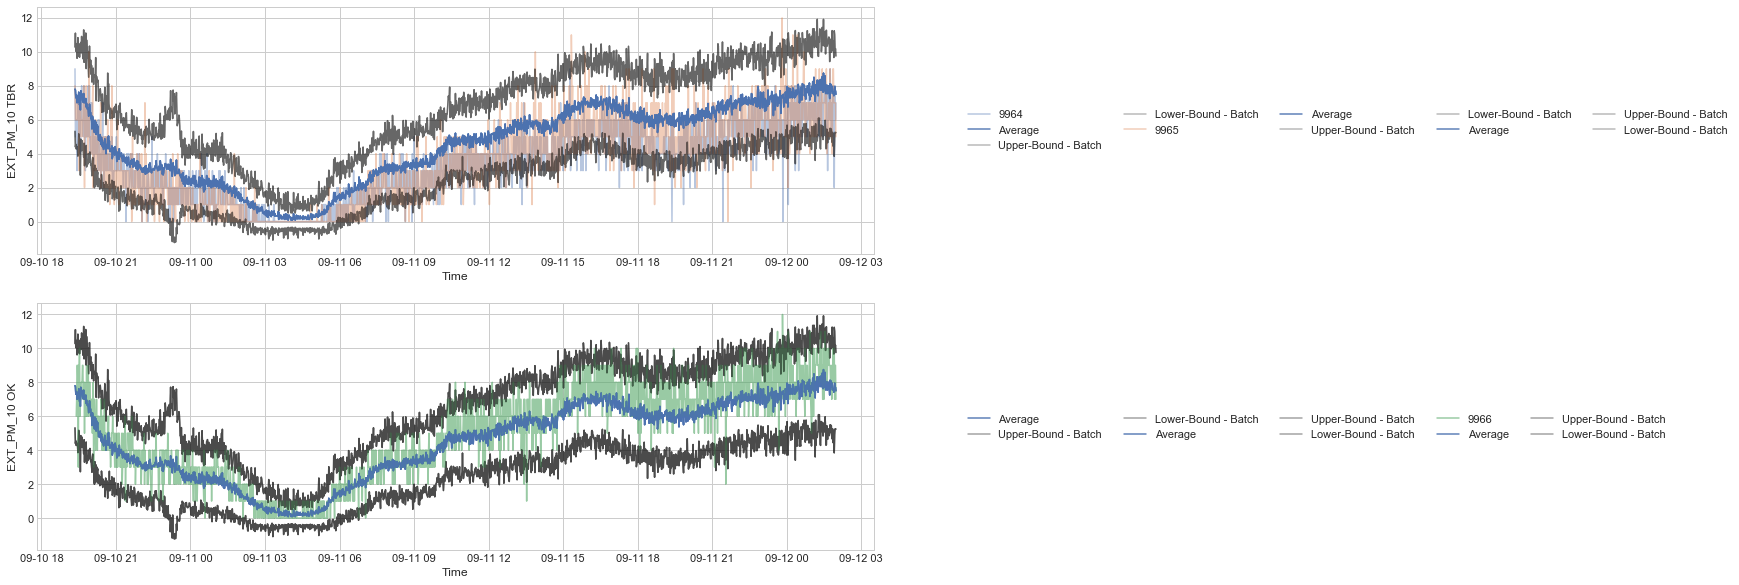

In [32]:
print ('Min Date: {} // Max Date: {}'.format(min_date, max_date))
# Ignore battery
if 'BATT' in list_channels: list_channels.remove('BATT')

dispersion_df = pd.DataFrame()

for channel in list_channels:
    # Make subplot
    list_columns = list()
    fig, (ax1, ax2) = plot.subplots(nrows = 2, figsize= (15,10))
    print ('Analysing {}'.format(channel))
    # For each device, resample. Then add it to the list of columns to check
    for device in list_devices:
        if channel in records.readings[dispersion_test]['devices'][device]['data'].columns:
            print ('Resampling device')
            # Important to resample and bfill for unmatching measures
            dispersion_df[channel + '-' + device] = records.readings[dispersion_test]['devices'][device]['data'][channel].resample('1Min').bfill()
            list_columns.append(channel + '-' + device)
    
    # Trim dataset to min and max dates (normally these tests are carried out with _minutes_ of differences)
    if min_date != None: dispersion_df = dispersion_df[dispersion_df.index > min_date]
    if max_date != None: dispersion_df = dispersion_df[dispersion_df.index < max_date]
    
    # Calculate Metrics
    print ('Calculating metrics')
    dispersion_df[channel + '_AVG'] = dispersion_df.loc[:,list_columns].mean(skipna=True, axis = 1)
    dispersion_df[channel + '_STD'] = dispersion_df.loc[:,list_columns].std(skipna=True, axis = 1)
    
    dispersion_global = 0
    limit_confidence_sigma = 0
    for item in dispersion_history:
        if channel == item[0]:
            dispersion_global = item[1]
            limit_confidence_sigma = item[2]
    
    dispersion_df[channel + '_MAX'] = dispersion_df.loc[:,list_columns].max(skipna=True, axis = 1)
    dispersion_df[channel + '_MIN'] = dispersion_df.loc[:,list_columns].min(skipna=True, axis = 1)
    
    print ('Calculating upper and lower bounds')
    upper_bound = dispersion_df[channel + '_AVG'] + limit_confidence_sigma * dispersion_df[channel + '_STD']
    lower_bound = dispersion_df[channel + '_AVG'] - limit_confidence_sigma * dispersion_df[channel + '_STD']
    
    # upper_bound2 = dispersion_df[channel + '_AVG'] + limit_confidence_sigma*dispersion_global
    # lower_bound2 = dispersion_df[channel + '_AVG'] - limit_confidence_sigma*dispersion_global
        
    for device in list_devices:
        name_column = channel + '-' + device 
        if name_column in dispersion_df.columns:
            
            # Count how many times we go above the upper bound or below the lower one
            count_problems_up = dispersion_df[name_column] > upper_bound
            count_problems_down =  dispersion_df[name_column] < lower_bound
            
            # Count them
            count_problems = [1 if (count_problems_up[i] or count_problems_down[i]) else 0 for i in range(len(count_problems_up))]
            # print (channel, device, np.sum(count_problems), len(count_problems))
            
            # Add the trace in either
            if np.sum(count_problems) > len(count_problems)/limit:
                alpha = 0.4
                ax1.plot(dispersion_df.index, 
                         dispersion_df[name_column], 
                         label = device, alpha = alpha)
            else:
                alpha = 0.6
                color = 'g'
                ax2.plot(dispersion_df.index, 
                         dispersion_df[name_column], 
                         color = color, 
                         label = device, alpha = alpha)
        
        # Add upper and low bound bound to subplot 1
        ax1.plot(dispersion_df.index, dispersion_df[channel + '_AVG'],'b', label = 'Average', alpha = 0.9)
        ax1.plot(dispersion_df.index, upper_bound, 'k', label = 'Upper-Bound - Batch', alpha = 0.3)
        ax1.plot(dispersion_df.index, lower_bound, 'k',label = 'Lower-Bound - Batch', alpha = 0.3)
        # ax1.plot(dispersion_df.index, upper_bound2, 'b', label = 'Upper-Bound - History', alpha = 0.2)
        # ax1.plot(dispersion_df.index, lower_bound2, 'b',label = 'Lower-Bound - History', alpha = 0.2)
        
        # Format the legend
        lgd1 = ax1.legend(bbox_to_anchor=(1.1, 0.5), fancybox=True, loc='center left', ncol = 5)
        ax1.grid(True)
        ax1.set_ylabel(channel + ' TBR')
        ax1.set_xlabel('Time')
        
        # Add upper and low bound bound to subplot 2
        ax2.plot(dispersion_df.index, dispersion_df[channel + '_AVG'],'b', label = 'Average', alpha = 0.9)
        ax2.plot(dispersion_df.index, upper_bound, 'k', label = 'Upper-Bound - Batch', alpha = 0.4)
        ax2.plot(dispersion_df.index, lower_bound, 'k',label = 'Lower-Bound - Batch', alpha = 0.4)
        # ax2.plot(dispersion_df.index, upper_bound2, 'b', label = 'Upper-Bound - History', alpha = 0.2)
        # ax2.plot(dispersion_df.index, lower_bound2, 'b',label = 'Lower-Bound - History', alpha = 0.2)
        
        # Format the legend
        ax2.legend(bbox_to_anchor=(1.1, 0.5), fancybox=True, loc='center left', ncol = 5)
        lgd2 = ax2.legend(bbox_to_anchor=(1.1, 0.5), fancybox=True, loc='center left', ncol = 5)
        ax2.grid(True)
        ax2.set_ylabel(channel + ' OK')
        ax2.set_xlabel('Time')
        
        # Check file type to make the export
        if type_file == 'fig':
            pickle.dump(fig, open(save_path + '/' + dispersion_test + '_' + channel + '.fig.pickle', 'wb'))
        elif type_file == 'png':
            fig.savefig(save_path + '/' + dispersion_test + '_' + channel + '.png', dpi=300, trasnparent = True, bbox_extra_artists=(lgd1, lgd2), bbox_inches='tight' )

# Show plots     
plot.show()

In [ ]:
## WRONG KITS
9967 - > SHT31
9974 - > CO2
9977 - > No PM